In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [37]:
df_tempo = pd.DataFrame(columns=["execucao", "biblioteca", "tempo", "arquivo", "linhas"])

In [39]:
def medidor_de_tempo(execucao, biblioteca, funcao, nome_do_arquivo, *args, **kwargs):
    global df_tempo
    inicio = time.time()
    resultado = funcao(*args, **kwargs)
    tempo = time.time() - inicio

    if biblioteca == 'Pandas':
        if resultado is not None:
            numero_linhas_arq = resultado.shape[0]  
        else:
            numero_linhas_arq = pd.read_csv(nome_do_arquivo).shape[0] 
    else:
        numero_linhas_arq = resultado.count() if resultado is not None else 0

    df_tempo = pd.concat([df_tempo,
                          pd.DataFrame({
                              "execucao": [execucao],
                              "biblioteca": [biblioteca],
                              "tempo": [tempo],
                              "arquivo": [nome_do_arquivo],
                              "linhas": [numero_linhas_arq]
                          })], ignore_index=True)

    return resultado

Arquivo com menos de 10.000 linhas com Pandas

In [28]:
def extracao(arquivo):
    return pd.read_csv(arquivo)

arquivo = 'cards_data.csv'

df_cards = medidor_de_tempo('Extracao', 'Pandas', extracao, arquivo, arquivo)

In [40]:
def describe(df):
    print(df.describe())

medidor_de_tempo('Descricao', 'Pandas', describe, arquivo, df_cards)

                id    client_id   card_number          cvv  num_cards_issued  \
count  6146.000000  6146.000000  6.146000e+03  6146.000000       6146.000000   
mean   3072.500000   994.939636  4.820426e+15   506.220794          1.503091   
std    1774.341709   578.614626  1.328582e+15   289.431123          0.519191   
min       0.000000     0.000000  3.001055e+14     0.000000          1.000000   
25%    1536.250000   492.250000  4.486365e+15   257.000000          1.000000   
50%    3072.500000   992.000000  5.108957e+15   516.500000          1.000000   
75%    4608.750000  1495.000000  5.585237e+15   756.000000          2.000000   
max    6145.000000  1999.000000  6.997197e+15   999.000000          3.000000   

       year_pin_last_changed  
count            6146.000000  
mean             2013.436707  
std                 4.270699  
min              2002.000000  
25%              2010.000000  
50%              2013.000000  
75%              2017.000000  
max              2020.000000  


In [41]:
def remover_nulos(df):
    return df.dropna()

df_cards_sem_nulls = medidor_de_tempo('Remover nulos', 'Pandas', remover_nulos, arquivo, df_cards)

In [42]:
def carregar(df, nome):
    df.to_csv(nome, index=False)

nome = 'cards_data_alterado.csv'
medidor_de_tempo('Carregar', 'Pandas', carregar, arquivo, df_cards_sem_nulls, nome)

Arquivo com mais de 1.000.000 de linhas com Pandas

In [43]:
def extracao(arquivo):
    return pd.read_csv(arquivo)

arquivo2 = 'Transactions.csv'

df_transactions = medidor_de_tempo('Extracao', 'Pandas', extracao, arquivo2, arquivo2)

In [44]:
def describe(df):
    print(df.describe())

medidor_de_tempo('Descricao', 'Pandas', describe, arquivo2, df_transactions)

                 id     client_id       card_id   merchant_id            zip  \
count  1.014576e+06  1.014576e+06  1.014576e+06  1.014576e+06  888466.000000   
mean   1.559300e+07  1.026610e+03  3.472917e+03  4.769056e+04   51351.446673   
std    4.702142e+06  5.815484e+02  1.675506e+03  2.581219e+04   29410.189251   
min    7.475329e+06  0.000000e+00  0.000000e+00  5.000000e+00    1002.000000   
25%    1.151916e+07  5.190000e+02  2.411000e+03  2.588700e+04   28602.000000   
50%    1.558064e+07  1.072000e+03  3.581000e+03  4.592600e+04   47803.000000   
75%    1.966144e+07  1.529000e+03  4.896000e+03  6.757000e+04   78046.000000   
max    2.376184e+07  1.998000e+03  6.138000e+03  1.003400e+05   99928.000000   

                mcc  
count  1.014576e+06  
mean   5.564292e+03  
std    8.756066e+02  
min    1.711000e+03  
25%    5.300000e+03  
50%    5.499000e+03  
75%    5.812000e+03  
max    9.402000e+03  


In [48]:
def remover_nulos(df):
     df_final = df.dropna()
     return df_final

df_transactions_sem_nulls = medidor_de_tempo('Remover nulos', 'Pandas', remover_nulos, arquivo2, df_transactions)

In [46]:
def carregar(df, nome):
    df.to_csv(nome, index=False)

nome2 = 'Transactions_alterado.csv'
medidor_de_tempo('Carregar', 'Pandas', carregar, arquivo2, df_transactions_sem_nulls, nome2)

Arquivo com 1.000.000 de linhas com Pyspark

In [ ]:
spark = SparkSession.builder.appName("PySpark Example").getOrCreate()

In [ ]:
def extracao(arquivo):
    return spark.read.csv(arquivo, header=True, inferSchema=True)

arquivo = 'cards_data.csv'
df_cards_pyspark = medidor_de_tempo('Extracao', 'PySpark', extracao, arquivo, arquivo)

In [ ]:
def describe(df):
    df.describe().show()

medidor_de_tempo('Descricao', 'PySpark', describe, arquivo, df_cards_pyspark)

In [ ]:
def remover_nulos(df):
    return df.dropna()

df_cards_sem_nulls_pys = medidor_de_tempo('Remover nulos', 'PySpark', remover_nulos,arquivo, df_cards_pyspark)

In [ ]:
def carregar(df, nome):
    df.write.csv(nome, header=True, mode='overwrite')

nome = 'cards_data_alterado'
medidor_de_tempo('Carregar', 'PySpark', carregar, arquivo, df_cards_sem_nulls_pys, nome)

Arquivo com 1.000.000 de linhas com Pyspark

In [ ]:
def extracao(arquivo):
    return spark.read.csv(arquivo, header=True, inferSchema=True)

arquivo2 = 'Transactions.csv'
df_Transactions_pyspark = medidor_de_tempo('Extracao', 'PySpark', extracao, arquivo2, arquivo2)

In [ ]:
def describe(df):
    df.describe().show()

medidor_de_tempo('Descricao', 'PySpark', describe, arquivo2, df_Transactions_pyspark)

In [ ]:
def remover_nulos(df):
    return df.dropna()

df_Transactions_sem_nulls_pys = medidor_de_tempo('Remover nulos', 'PySpark', remover_nulos,arquivo2, df_Transactions_pyspark)

In [ ]:
def carregar(df, nome):
    df.write.csv(nome, header=True, mode='overwrite')

nome = 'Transactions_data_alterado'
medidor_de_tempo('Carregar', 'PySpark', carregar, arquivo2, df_Transactions_sem_nulls_pys, nome)

Comparações 

In [56]:
print(df_tempo.head(12))

        execucao biblioteca     tempo           arquivo   linhas
0      Descricao     Pandas  0.061964    cards_data.csv     6146
1  Remover nulos     Pandas  0.020988    cards_data.csv     6146
2       Carregar     Pandas  0.122927    cards_data.csv     6146
3       Extracao     Pandas  4.334800  Transactions.csv  1014576
4      Descricao     Pandas  0.468769  Transactions.csv  1014576
5  Remover nulos     Pandas  1.566108  Transactions.csv    13063
6       Carregar     Pandas  0.187892  Transactions.csv  1014576
7  Remover nulos     Pandas  1.609466  Transactions.csv    13063


In [50]:
tempo_medio = df_tempo.groupby('biblioteca')['tempo'].mean().reset_index()
tempo_medio.columns = ['Biblioteca', 'Tempo Médio (segundos)']
print("Tabela: Tempo Médio por Biblioteca")
print(tempo_medio)

Tabela: Tempo Médio por Biblioteca
  Biblioteca  Tempo Médio (segundos)
0     Pandas                1.046614


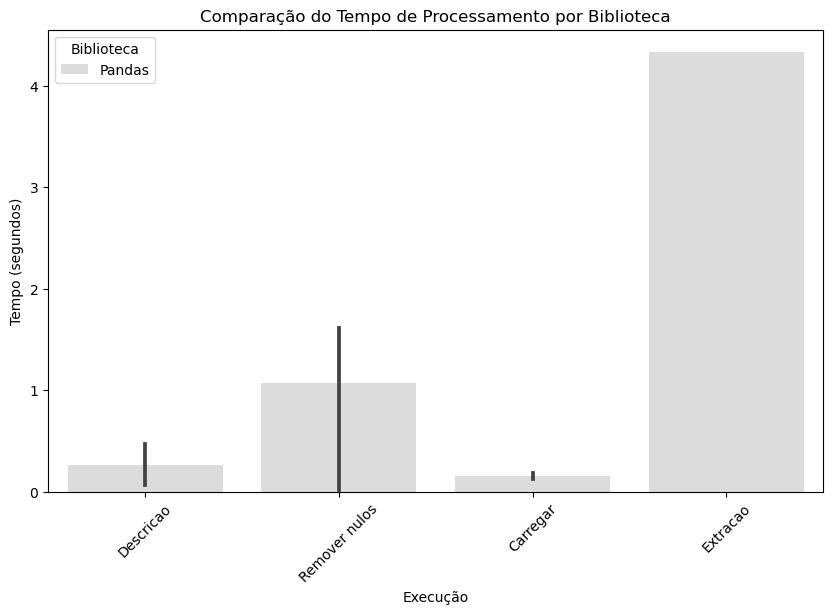

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tempo, x='execucao', y='tempo', hue='biblioteca', palette='coolwarm')
plt.title("Comparação do Tempo de Processamento por Biblioteca")
plt.xlabel("Execução")
plt.ylabel("Tempo (segundos)")
plt.legend(title="Biblioteca")
plt.xticks(rotation=45)
plt.show()

C:\Users\Antonio Dielson\AppData\Local\Temp\ipykernel_12368\663330625.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_tempo, x='linhas', y='tempo', hue='biblioteca', ci=None, palette='coolwarm')


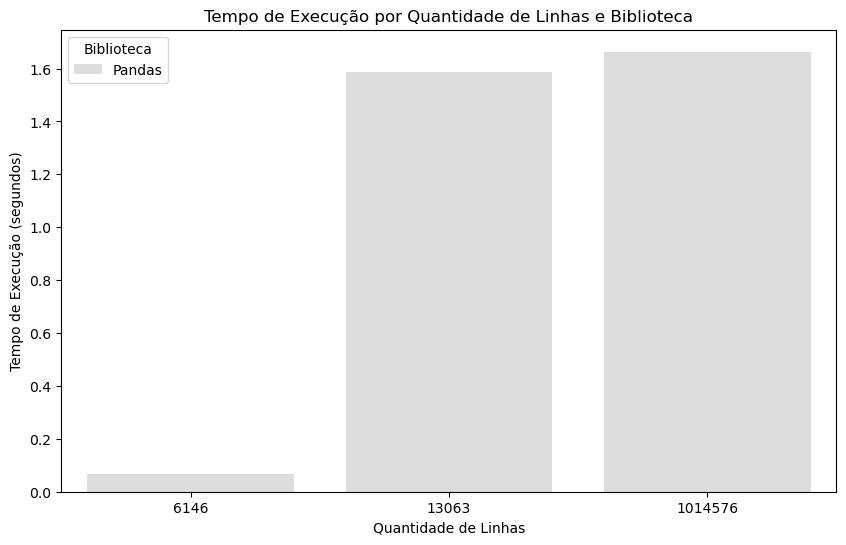

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_tempo, x='linhas', y='tempo', hue='biblioteca', ci=None, palette='coolwarm')
plt.title("Tempo de Execução por Quantidade de Linhas e Biblioteca")
plt.xlabel("Quantidade de Linhas")
plt.ylabel("Tempo de Execução (segundos)")
plt.legend(title="Biblioteca")
plt.show()